In [1]:
import csv
import numpy
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
fileName = r'C:\Users\sp728943\Downloads\prices-split-adjusted.csv'
df = pd.read_csv(fileName)
df.apply(lambda x: sum(x.isnull()), axis=0)   # Checking for null values

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [3]:
symbol = df.symbol.unique()
execute = True
while execute:
    sym = input('Enter symbol of share?')         #Input stock name from user
    if sym in symbol:
        execute = False
    else:
        print("Enter a valid share symbol") 

Enter symbol of share?ebay
Enter a valid share symbol
Enter symbol of share?wltw
Enter a valid share symbol
Enter symbol of share?WLTW


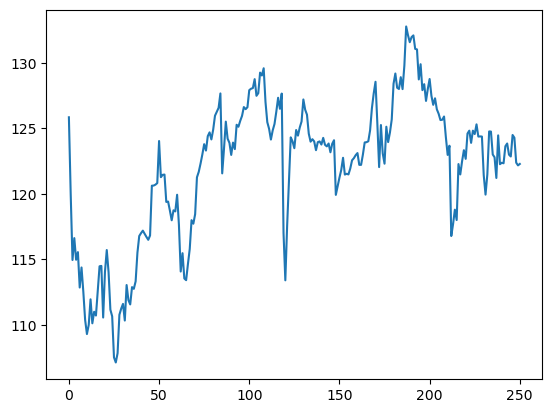

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
df1 = df[df.symbol.apply(lambda x:x==sym)] # Retrieving data of that particular share
plt.plot(df1.index,df1.close)

In [5]:
df2 = df1.loc[:,'open':] # Considering important columns
df2.head()

,open,close,low,high,volume
0,123.430000,125.839996,122.309998,126.250000,2163600.0
1,125.239998,119.980003,119.940002,125.540001,2386400.0
2,116.379997,114.949997,114.930000,119.739998,2489500.0
3,115.480003,116.620003,113.500000,117.440002,2006300.0
4,117.010002,114.970001,114.089996,117.330002,1408600.0


In [6]:
days = 22                            # Creating features based on last 22 days of data
df3 = pd.DataFrame()
rows = df2.shape[0]
for i in range(1,rows-days):
    s = pd.Series()
    for j in range(i,i+days):
        s = s.append(df2.iloc[j,:])
    df4 = pd.DataFrame(s)
    df3 = df3.append(df4.transpose())
df3.head() 
df3 = df3.reset_index(drop=True)
df3.shape

(228, 110)

In [7]:
y = pd.DataFrame()
y = df2.close[days+1:]
y = y.transpose()
y = y.reset_index(drop=True)
y.head()   

0    111.160004
1    110.650002
2    107.519997
3    107.129997
4    107.839996
Name: close, dtype: float64

In [8]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()        #  Using Linear Regression model
test_days = 30
train = df3.shape[0]-test_days
x_train = df3.iloc[0:train]            # Dividng training and tesing data
x_train.head() 

,open,close,low,high,volume,open,close,low,high,volume,...,open,close,low,high,volume,open,close,low,high,volume
0,125.239998,119.980003,119.940002,125.540001,2386400.0,116.379997,114.949997,114.930000,119.739998,2489500.0,...,114.080002,115.709999,114.080002,116.320000,956300.0,115.120003,114.019997,109.709999,116.489998,997100.0
1,116.379997,114.949997,114.930000,119.739998,2489500.0,115.480003,116.620003,113.500000,117.440002,2006300.0,...,115.120003,114.019997,109.709999,116.489998,997100.0,113.300003,111.160004,110.459999,113.300003,1200500.0
2,115.480003,116.620003,113.500000,117.440002,2006300.0,117.010002,114.970001,114.089996,117.330002,1408600.0,...,113.300003,111.160004,110.459999,113.300003,1200500.0,111.169998,110.650002,109.639999,112.110001,1725200.0
3,117.010002,114.970001,114.089996,117.330002,1408600.0,115.510002,115.550003,114.500000,116.059998,1098000.0,...,111.169998,110.650002,109.639999,112.110001,1725200.0,106.730003,107.519997,106.360001,112.110001,1946000.0
4,115.510002,115.550003,114.500000,116.059998,1098000.0,116.459999,112.849998,112.589996,117.070000,949600.0,...,106.730003,107.519997,106.360001,112.110001,1946000.0,105.629997,107.129997,104.110001,109.260002,1319500.0


In [9]:
y_train = y.iloc[0:train]
model.fit(x_train, y_train) # Fitting Linear Model

LinearRegression()

In [10]:
x_test = df3.iloc[train+1:]
y_test = pd.Series(model.predict(x_test))     # Predicting the Linear Model
y_actual = y.iloc[train+1:]
mean_squared_error(y_test,y_actual) #Mean Squared Error of Test Data

8.255369929504214

In [11]:
[y_test] # Model Predicted Values

[0     125.404204
 1     123.593320
 2     124.194547
 3     124.687725
 4     123.269538
 5     125.362534
 6     127.584500
 7     124.295362
 8     122.585799
 9     123.913667
 10    116.970398
 11    118.541484
 12    120.346105
 13    122.321997
 14    122.759118
 15    123.788642
 16    118.079857
 17    122.209058
 18    120.289129
 19    118.487644
 20    118.649907
 21    119.996284
 22    122.612780
 23    124.969310
 24    123.522112
 25    126.058311
 26    125.569721
 27    122.365878
 28    123.764250
 dtype: float64]

In [12]:
y_actual=y_actual.reset_index(drop=True)
y_test= y_test.reset_index(drop=True)
y_actual.head()

0    124.820000
1    123.889999
2    124.820000
3    124.559998
4    125.300003
Name: close, dtype: float64

In [13]:
y_test.head() 

0    125.404204
1    123.593320
2    124.194547
3    124.687725
4    123.269538
dtype: float64

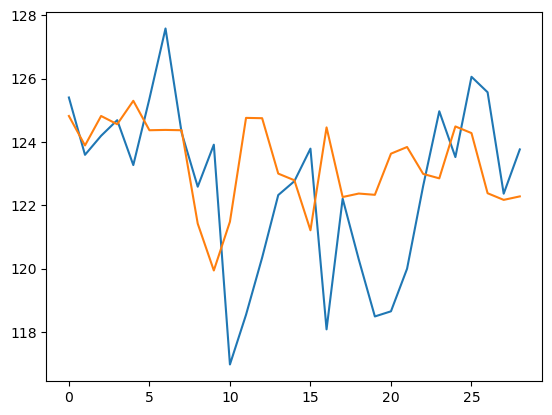

In [14]:
plt.plot(y_test)          # Comparing test predictions with actual data
plt.plot(y_actual)        # Blue - y_test and Orange - y_actual

In [15]:
r2_score(y_test,y_actual) #r2 score of model

-0.18584184844410112

In [16]:
y_train_test = pd.Series(model.predict(x_train))
mean_squared_error(y_train,y_train_test)          #Mean Squared Error of Training Data


1.2753534100689878

In [17]:
r2_score(y_train,y_train_test)                   #r2_score of Training Data

0.9523885893899361

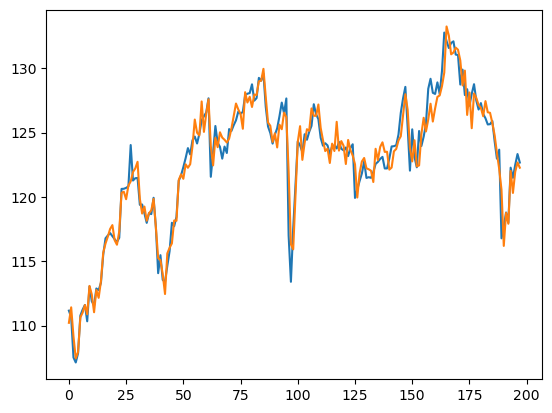

In [18]:
y_train = y_train.reset_index(drop=True)
y_train_test = y_train_test.reset_index(drop=True)
plt.plot(y_train)
plt.plot(y_train_test)            #Visualization of Predictions vs Actual Data

In [19]:
x_train_squared = x_train**2           # Making the training features squared for Ploynomial Regression 
x_poly_train = pd.concat([x_train, x_train_squared], axis=1)
x_poly_train = x_poly_train.reset_index(drop=True)
x_poly_train.head() # Features for polynomial regression model

,open,close,low,high,volume,open,close,low,high,volume,...,open,close,low,high,volume,open,close,low,high,volume
0,125.239998,119.980003,119.940002,125.540001,2386400.0,116.379997,114.949997,114.930000,119.739998,2489500.0,...,13014.246856,13388.803869,13014.246856,13530.342400,9.145097e+11,13252.615091,13000.559716,12036.283881,13569.919634,9.942084e+11
1,116.379997,114.949997,114.930000,119.739998,2489500.0,115.480003,116.620003,113.500000,117.440002,2006300.0,...,13252.615091,13000.559716,12036.283881,13569.919634,9.942084e+11,12836.890680,12356.546489,12201.411379,12836.890680,1.441200e+12
2,115.480003,116.620003,113.500000,117.440002,2006300.0,117.010002,114.970001,114.089996,117.330002,1408600.0,...,12836.890680,12356.546489,12201.411379,12836.890680,1.441200e+12,12358.768455,12243.422943,12020.929381,12568.652324,2.976315e+12
3,117.010002,114.970001,114.089996,117.330002,1408600.0,115.510002,115.550003,114.500000,116.059998,1098000.0,...,12358.768455,12243.422943,12020.929381,12568.652324,2.976315e+12,11391.293540,11560.549755,11312.449813,12568.652324,3.786916e+12
4,115.510002,115.550003,114.500000,116.059998,1098000.0,116.459999,112.849998,112.589996,117.070000,949600.0,...,11391.293540,11560.549755,11312.449813,12568.652324,3.786916e+12,11157.696266,11476.836257,10838.892308,11937.748037,1.741080e+12


In [20]:
x_test_squared = x_test**2          # Making the test features squared for Ploynomial Regression
x_poly_test = pd.concat([x_test, x_test_squared], axis=1)
x_poly_test = x_poly_test.reset_index(drop=True)
x_poly_test.head() 

,open,close,low,high,volume,open,close,low,high,volume,...,open,close,low,high,volume,open,close,low,high,volume
0,128.460007,128.759995,127.879997,129.429993,435600.0,127.379997,127.480003,126.239998,128.630005,554800.0,...,15170.848407,15047.928409,14945.062500,15170.848407,6.697786e+11,15077.384346,15525.159502,14930.396589,15535.129351,2.751002e+11
1,127.379997,127.480003,126.239998,128.630005,554800.0,126.339996,126.790001,126.040001,127.250000,496600.0,...,15077.384346,15525.159502,14930.396589,15535.129351,2.751002e+11,15572.544350,15580.032400,15450.490746,15863.401744,6.707610e+11
2,126.339996,126.790001,126.040001,127.250000,496600.0,127.330002,127.290001,127.120003,128.240005,312000.0,...,15572.544350,15580.032400,15450.490746,15863.401744,6.707610e+11,15650.009500,15348.731852,15259.660653,15740.211349,2.264808e+11
3,127.330002,127.290001,127.120003,128.240005,312000.0,127.089996,126.449997,125.669998,127.089996,414700.0,...,15650.009500,15348.731852,15259.660653,15740.211349,2.264808e+11,15467.897646,15580.032400,15109.325908,15725.160502,1.023537e+12
4,127.089996,126.449997,125.669998,127.089996,414700.0,126.129997,126.110001,125.360001,126.919998,478300.0,...,15467.897646,15580.032400,15109.325908,15725.160502,1.023537e+12,15580.032400,15515.193102,15294.268405,15762.803253,1.445520e+11


In [21]:
poly_model = linear_model.LinearRegression(normalize=True)  
poly_model.fit(x_poly_train, y_train)                # Fitting a Polynomial Regression Model with Squared Features

LinearRegression(normalize=True)

In [22]:
y_poly_predict = pd.Series(poly_model.predict(x_poly_test))
mean_squared_error(y_poly_predict,y_actual) #Mean Squared Error of Polynomial Regression Model

111.4535470614951

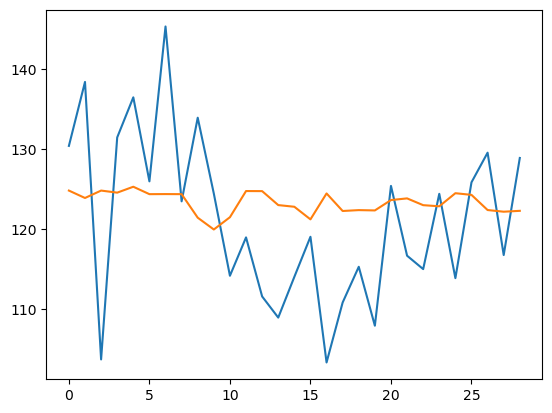

In [23]:
plt.plot(y_poly_predict)      #Comparing test predictions with actual data 
plt.plot(y_actual)            # Blue - y_test and Orange - y_actual

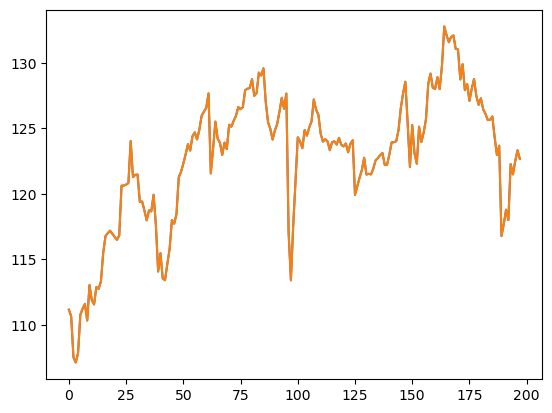

In [26]:
y_poly_train_predict = poly_model.predict(x_poly_train)
plt.plot(y_train)
plt.plot(y_poly_train_predict) # Overfitting visualization